### Resultados y análisis de datos de mediciones en test de patrones de partículas certificados.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math as m

In [2]:
%run functions.ipynb

In [3]:
df = pd.read_csv('2022-02-14.1LPMSP05.csv', sep = ';')   #TESTE DESDE 16:55 / 16:15 (20min) GRIMM
df.index = df['date&time / mean diameter [�m]']
df = df.drop( ['date&time / mean diameter [�m]']  , axis = 1)

datos_opc = pd.read_csv('opc_paper_new.csv' , sep = ',') #TEST DESDE LA FILA 325 A 425 OPC
df_opc = new_opc_pl(datos_opc)    #CAMBIO EL DATAFRAME DEL OPC DE P/S A P/L

df

,0.275,0.324,0.382,0.449,0.53,0.625,0.737,0.869,1.024,1.207,...,8.686,10.24,12.069,14.227,16.773,19.768,23.301,27.467,32.375,41.431
date&time / mean diameter [�m],,,,,,,,,,,,,,,,,,,,,
14/02/2022 15:50:21,0.19,0.11,0.09,0.08,0.07,0.06,0.05,0.04,0.06,0.09,...,0.00,0.91,0.00,2.44,0.00,0.00,0.00,0.00,0.00,0.00
14/02/2022 15:51:21,0.19,0.12,0.08,0.07,0.07,0.07,0.05,0.04,0.05,0.13,...,0.55,0.91,1.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00
14/02/2022 15:52:21,0.18,0.11,0.09,0.08,0.07,0.06,0.05,0.06,0.07,0.07,...,1.11,0.00,1.49,2.44,0.00,0.00,0.00,0.00,0.00,0.00
14/02/2022 15:53:21,0.18,0.11,0.08,0.08,0.06,0.06,0.06,0.07,0.07,0.04,...,1.11,0.00,1.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00
14/02/2022 15:54:21,0.18,0.11,0.09,0.09,0.08,0.07,0.04,0.05,0.05,0.07,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
14/02/2022 15:55:21,0.31,0.24,0.32,1.32,2.28,6.00,8.92,6.87,6.93,8.55,...,47.69,32.72,17.85,2.44,0.00,0.00,0.00,0.00,0.00,0.00
14/02/2022 15:56:21,1.52,1.03,2.08,10.68,15.29,33.28,48.82,37.22,38.14,49.65,...,201.29,109.05,53.56,41.43,7.99,19.61,10.71,17.54,0.00,0.00
14/02/2022 15:57:21,2.05,1.19,2.53,12.58,17.13,36.63,52.72,41.68,43.30,58.98,...,206.28,120.87,55.05,29.24,11.98,6.54,0.00,17.54,0.00,0.00
14/02/2022 15:58:21,1.30,0.87,1.75,8.84,12.98,29.15,43.91,34.77,36.32,48.47,...,145.29,90.88,31.24,19.50,7.99,0.00,10.71,0.00,0.00,0.00


### Cálculos estadísticos de percentiles para sonsor GRIMM

In [4]:
mas = []

for i in range(len(df.columns)):           # OBTENGO LA SUMA DE CADA COLUMNA
    a = sum((df.iloc[:,i][5:26]))
    mas.append(a)

In [5]:
x = [0.7019047619047619,0.49523809523809526,0.8380952380952378,3.8757142857142863,6.023333333333334,14.840952380952382,23.063809523809528,18.48190476190476,18.99285714285714,24.21333333333333,42.46238095238095,77.5652380952381,196.24571428571429,421.1761904761906,467.88190476190476,515.3761904761905,563.5957142857142,514.9247619047619,382.4861904761904,264.7414285714286,157.84571428571428,78.5838095238095,46.305238095238096,18.63238095238095,8.82,3.9928571428571424,1.868095238095238,3.06,4.175714285714285,0.0,0.0]

N = []
acum = 0

# PERCENTILES SACADOS CON LA SUMA TOTAL, SIN HACER LA MEDIA

for i in range(len(x)):
    acum += x[i]
    N.append(acum)    
N2 = 3881.2666666666664 / 2   
 
D50 = 3.515 + ( (N2 - N[15] ) / (x[16]) )*(4.144 - 3.515)    
    
N2 = 81506.6 / 2
N90 = 81506.6*(9/10)
N10 = 81506.6*(1/10)

D50 = 3.515 + ( (N2 - N[15] ) / (x[16]) )*(4.144 - 3.515)
D90 = 5.757 + ( (N90 - N[18] ) / (x[19]) )*(6.787 - 5.757)
D10 = 1.821 + ( (N10 - N[11] ) / (x[12]) )*(2.146 - 1.821)

print(D50,D90,D10)
D50

mas = np.array(mas)
tot = mas / sum(mas)

r_grim = [0.275, 0.324, 0.382, 0.449, 0.53, 0.625, 0.737, 0.869,
       1.024, 1.207, 1.423, 1.677, 1.977, 2.33, 2.747, 3.238,
       3.817, 4.499, 5.303, 6.251, 7.369, 8.686, 10.24, 12.069,
       14.227, 16.773, 19.768, 23.301, 27.467, 32.375, 41.431]  

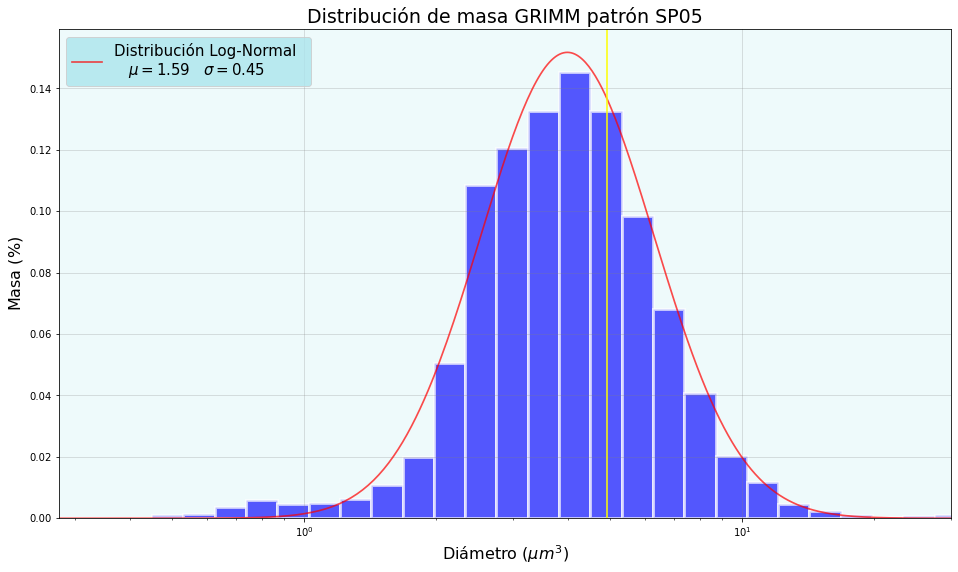

In [20]:
fig = plt.figure(figsize = (16,9))

mu = 1.59
sigma = 0.455

a = np.linspace(0.245, 40, 1000)
b =  (1/1.7)*( 1 / a*sigma*np.sqrt(2*np.pi) )*np.exp( -  (np.log(a) - mu)**2 / (2*sigma**2)  )

plt.rcParams.update({  "axes.facecolor":    (0.67 , 0.9, 0.93, 0.2)  })
plt.grid(alpha = 0.3 , color = 'gray' , linestyle = '-' , linewidth = '0.8')

plt.xscale("log")
widths = np.diff(r_grim + [r_grim[-1] * 10] )

plt.bar(r_grim, tot, widths, align='edge', facecolor='blue', edgecolor='white', lw = 3 , alpha = 0.65)
plt.plot(a , b , color = 'r' , alpha = 0.7 , linewidth = '1.7' , label = 'Distribución Log-Normal \n   $\mu=1.59$   $\sigma=0.45$         ')

plt.axvline(x = np.exp(mu)  , color = 'yellow')


plt.title('Distribución de masa GRIMM patrón SP05' , fontsize = '19')
plt.xlabel('Diámetro ($\mu m^{3}$)' , color = 'black' , fontsize = '16')
plt.ylabel('Masa ($\%$)' , color = 'black' , fontsize = '16')

plt.xlim(0.275,30)

plt.legend(loc = "upper left" , prop={'size':15} ,  facecolor = '#ACE5EE33' )

plt.savefig('SP05_GRIMM.pdf',bbox_inches='tight')

### Cálculos estadísticos de percentiles para sonsor OPC-N3

In [7]:
display(df_opc)   # OPC YA PASADO A P/L

,Bin00,Bin01,Bin02,Bin03,Bin04,Bin05,Bin06,Bin07,Bin08,Bin09,...,Bin14,Bin15,Bin16,Bin17,Bin18,Bin19,Bin20,Bin21,Bin22,Bin23
0,475.949367,65.822785,25.316456,7.594937,27.848101,5.063291,2.531646,5.063291,2.531646,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,508.238276,49.429658,35.487959,2.534854,5.069708,6.337136,1.267427,1.267427,2.534854,1.267427,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,423.558897,37.593985,37.593985,5.012531,10.025063,10.025063,0.000000,2.506266,0.000000,2.506266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,455.919395,62.972292,35.264484,10.075567,2.518892,0.000000,5.037783,2.518892,5.037783,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,362.831858,56.890013,24.020228,2.528445,7.585335,3.792668,2.528445,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,218.134034,24.967148,31.537451,3.942181,5.256242,2.628121,2.628121,2.628121,1.314060,1.314060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1432,166.666667,31.250000,15.625000,0.000000,5.208333,7.812500,2.604167,2.604167,2.604167,2.604167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1433,142.083897,35.182679,14.884980,5.412720,5.412720,1.353180,4.059540,2.706360,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,161.559889,41.782730,11.142061,5.571031,8.356546,5.571031,0.000000,0.000000,0.000000,2.785515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
counts = []

for i in range(len(df_opc.columns)):             # SUMO TODAS LAS COLUMNAS (BINS)
    c = sum(df_opc.iloc[:,i][265:285])
    counts.append(c)     # EN COUNTS GUARDO LA LISTA CON LA SUMA DE TODAS LAS COLUMNAS

# RADIOS MEDIOS DEL OPC PARA CADA BIN
    
r = np.array([0.405,0.56,0.83,1.15,1.5,2,2.65,3.5,4.6,5.85,7.25,9,11,13,15,17,19,21,23.5,26.5,29.5,32.5,35.5,38.5])  

vol = (4/3)*np.pi*r**3

vp = vol*3.75e-6    # MULTIPLICO VOLUMEN POR LA DENSIDAD (EN ug/um3)

mas = []

for i in range(len(vp)):
    m = vp[i]*counts[i]
    mas.append(m)
    
mas = np.array(mas)

tot_opc = mas / np.sum(mas)
r_opc = [0.405,0.56,0.83,1.15,1.5,2,2.65,3.5,4.6,5.85,7.25,9,11,13,15,17,19,21,23.5,26.5,29.5,32.5,35.5,38.5]

In [9]:
#Cálculo de percentiles para OPC

N = []
acum = 0

for k in range(len(mas)):
    acum += mas[k]
    N.append(acum)

N2 = 7.24241743165699e-11 / 2
N90 = 7.24241743165699e-11*(9/10)
N10 = 7.24241743165699e-11*(1/10)

D50 = 4 + ( (N2 - N[7] ) / (mas[8]) )*(5.2 - 4)
D90 = 6.5 + ( (N90 - N[9] ) / (mas[10]) )*(8 - 6.5)
D10 = 2.3 + ( (N10 - N[5] ) / (mas[6]) )*(3 - 2.3)

display(D10)

1.982894132101442

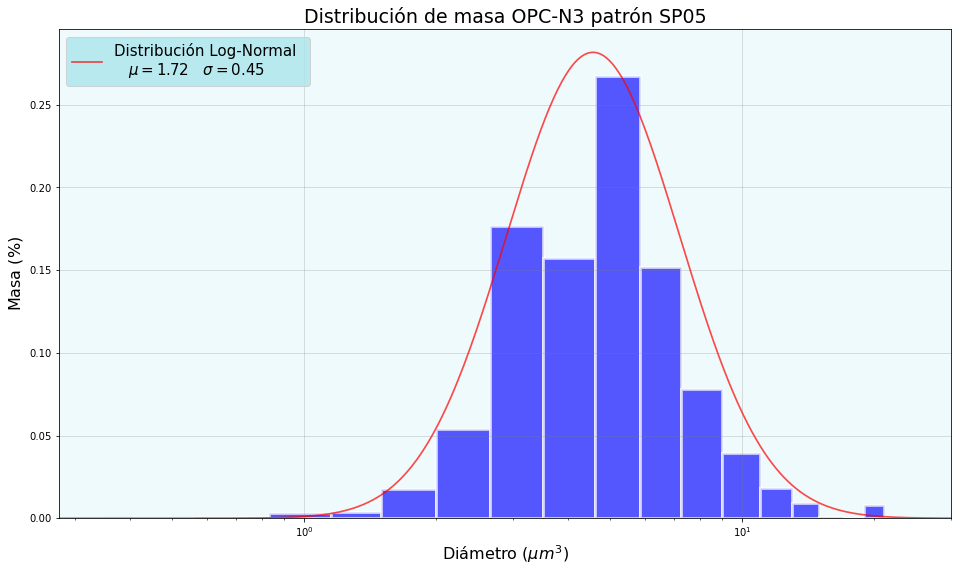

In [10]:
fig = plt.figure(figsize = (16,9))

mu = 1.725
sigma = 0.455

a = np.linspace(0.245, 40, 1000)
b =  (1.25)*( 1 / a*sigma*np.sqrt(2*np.pi) )*np.exp( -  (np.log(a) - mu)**2 / (2*sigma**2)  )

plt.rcParams.update({  "axes.facecolor":    (0.67 , 0.9, 0.93, 0.2)  })
plt.grid(alpha = 0.3 , color = 'gray' , linestyle = '-' , linewidth = '0.8')

plt.xscale("log")
widths = np.diff(r_opc + [r_opc[-1] * 10] )

plt.bar(r_opc, tot_opc, widths, align='edge', facecolor='blue', edgecolor='white', lw = 3 , alpha = 0.65)
plt.plot(a , b , color = 'r' , alpha = 0.7 , linewidth = '1.7' , label = 'Distribución Log-Normal \n   $\mu=1.72$   $\sigma=0.45$         ')

plt.title('Distribución de masa OPC-N3 patrón SP05' , fontsize = '19')
plt.xlabel('Diámetro ($\mu m^{3}$)' , color = 'black' , fontsize = '16')
plt.ylabel('Masa ($\%$)' , color = 'black' , fontsize = '16')

plt.xlim(0.275,30)

plt.legend(loc = "upper left" , prop={'size':15} ,  facecolor = '#ACE5EE33' )

plt.savefig('SP05_OPC.pdf',bbox_inches='tight')

### Conclusiones:

##### Ambos sensores presentan una distribución de tamaños de tipo Logaritmo Normal, así como dice el fabricante.
##### Los datos del sensor OPC-N3 son de peor calidad puesto que mide menos intervalos de BINS y se pierde definición en la distribución.